In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('sportsref_download.csv')

In [7]:
df.head()

,Rk,Player,Tm,Age,GS,Cmp,Att,Cmp%,Yds,TD,...,1D,AY/A,Yards/Cmp,Yards/Game,Rate,QBR,Sk,Yds.1,Sk% per Pass,ANY/A
0,1,Tom Brady,TAM,44,17,485,719,67.5,5316,43,...,269,7.8,11.0,312.7,102.1,68.1,22,144,3.0,7.41
1,2,Justin Herbert,LAC,23,17,443,672,65.9,5014,38,...,256,7.6,11.3,294.9,97.7,65.6,31,214,4.4,6.95
2,3,Matthew Stafford,LAR,33,17,404,601,67.2,4886,41,...,233,8.2,12.1,287.4,102.9,63.8,30,243,4.8,7.45
3,4,Patrick Mahomes,KAN,26,17,436,658,66.3,4839,37,...,260,7.6,11.1,284.6,98.5,62.2,28,146,4.1,7.07
4,5,Derek Carr,LVR,30,17,428,626,68.4,4804,23,...,217,7.4,11.2,282.6,94.0,52.4,40,241,6.0,6.60


In [15]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [29]:
df.columns

Index(['Player', 'Tm', 'Age', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'Int',
       'Int%', '1D', 'AY/A', 'Yards/Cmp', 'Yards/Game', 'Rate', 'QBR', 'Sk',
       'Sk% per Pass', 'ANY/A'],
      dtype='object')

In [47]:
# Data cleaning: we will set Player as the index
# drop not needed columns
# Rename columns 

df.set_index(df['Player'], inplace=True)
df.drop(df[['Rk', 'TD%', 'Yds.1']],axis=1, inplace=True)
df.rename(columns={'Player': 'Name'})
df.drop(columns='Player',inplace=True)

df.head()

,Tm,Age,GS,Cmp,Att,Cmp%,Yds,TD,Int,Int%,1D,AY/A,Yards/Cmp,Yards/Game,Rate,QBR,Sk,Sk% per Pass,ANY/A
Player,,,,,,,,,,,,,,,,,,,
Tom Brady,TAM,44,17,485,719,67.5,5316,43,12,1.7,269,7.8,11.0,312.7,102.1,68.1,22,3.0,7.41
Justin Herbert,LAC,23,17,443,672,65.9,5014,38,15,2.2,256,7.6,11.3,294.9,97.7,65.6,31,4.4,6.95
Matthew Stafford,LAR,33,17,404,601,67.2,4886,41,17,2.8,233,8.2,12.1,287.4,102.9,63.8,30,4.8,7.45
Patrick Mahomes,KAN,26,17,436,658,66.3,4839,37,13,2.0,260,7.6,11.1,284.6,98.5,62.2,28,4.1,7.07
Derek Carr,LVR,30,17,428,626,68.4,4804,23,14,2.2,217,7.4,11.2,282.6,94.0,52.4,40,6.0,6.60


In [49]:
#check data types and if any columns have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Tom Brady to Cooper Rush
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tm            49 non-null     object 
 1   Age           49 non-null     int64  
 2   GS            49 non-null     int64  
 3   Cmp           49 non-null     int64  
 4   Att           49 non-null     int64  
 5   Cmp%          49 non-null     float64
 6   Yds           49 non-null     int64  
 7   TD            49 non-null     int64  
 8   Int           49 non-null     int64  
 9   Int%          49 non-null     float64
 10  1D            49 non-null     int64  
 11  AY/A          49 non-null     float64
 12  Yards/Cmp     49 non-null     float64
 13  Yards/Game    49 non-null     float64
 14  Rate          49 non-null     float64
 15  QBR           49 non-null     float64
 16  Sk            49 non-null     int64  
 17  Sk% per Pass  49 non-null     float64
 18  ANY/A         49 non

In [51]:
# sort data to view who has the most yards throw
df.sort_values(by=['Yds'], inplace=False, ascending=False)

df.head()

,Tm,Age,GS,Cmp,Att,Cmp%,Yds,TD,Int,Int%,1D,AY/A,Yards/Cmp,Yards/Game,Rate,QBR,Sk,Sk% per Pass,ANY/A
Player,,,,,,,,,,,,,,,,,,,
Tom Brady,TAM,44,17,485,719,67.5,5316,43,12,1.7,269,7.8,11.0,312.7,102.1,68.1,22,3.0,7.41
Justin Herbert,LAC,23,17,443,672,65.9,5014,38,15,2.2,256,7.6,11.3,294.9,97.7,65.6,31,4.4,6.95
Matthew Stafford,LAR,33,17,404,601,67.2,4886,41,17,2.8,233,8.2,12.1,287.4,102.9,63.8,30,4.8,7.45
Patrick Mahomes,KAN,26,17,436,658,66.3,4839,37,13,2.0,260,7.6,11.1,284.6,98.5,62.2,28,4.1,7.07
Derek Carr,LVR,30,17,428,626,68.4,4804,23,14,2.2,217,7.4,11.2,282.6,94.0,52.4,40,6.0,6.60


In [ ]:
# Hypothesis: Cmp will dictate how much yards/game each player has.

# Hypothesis2: Age will dictate how many yards/game each player has.

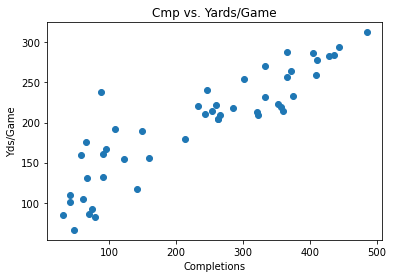

In [70]:
# visualize correlation using scatterplot: Cmp vs Yards/Game

plt.scatter(x=df['Cmp'], y=df['Yards/Game'])
plt.title('Cmp vs. Yards/Game')
plt.xlabel('Completions')
plt.ylabel('Yds/Game')
plt.show()

<AxesSubplot:xlabel='Cmp', ylabel='Yards/Game'>

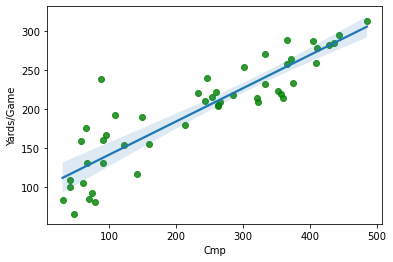

In [86]:
# plot regression line: Cmp vs Yards/Game
sns.regplot(x='Cmp', y='Yards/Game', data=df, scatter_kws={'color': 'green'})

In [ ]:
# we can infer that Completed passes have a correlation with Yards/Game
# Next, we can check if it is the most correlated or is there another correlation that is higher

In [101]:
df.corr()

,Age,GS,Cmp,Att,Cmp%,Yds,TD,Int,Int%,1D,AY/A,Yards/Cmp,Yards/Game,Rate,QBR,Sk,Sk% per Pass,ANY/A
Age,1.000000,-0.010278,0.058079,0.026075,0.238440,0.060316,0.194619,-0.188596,-0.174693,0.082874,0.138564,-0.118487,0.037235,0.227209,0.248450,-0.149793,-0.196604,0.171747
GS,-0.010278,1.000000,0.954632,0.963371,0.256764,0.956086,0.835633,0.795980,-0.246266,0.940773,0.279655,0.114784,0.822080,0.284097,0.444158,0.845983,-0.052855,0.283470
Cmp,0.058079,0.954632,1.000000,0.995451,0.387053,0.992074,0.904984,0.786495,-0.288294,0.992522,0.315795,0.041515,0.895310,0.362731,0.522282,0.776877,-0.176019,0.349555
Att,0.026075,0.963371,0.995451,1.000000,0.313643,0.985398,0.886870,0.809206,-0.267670,0.986658,0.270551,0.033891,0.883038,0.307711,0.479592,0.791445,-0.158723,0.302418
Cmp%,0.238440,0.256764,0.387053,0.313643,1.000000,0.390749,0.412000,0.077165,-0.401880,0.388758,0.536629,-0.047354,0.419898,0.679130,0.656712,0.175260,-0.173895,0.551160
Yds,0.060316,0.956086,0.992074,0.985398,0.390749,1.000000,0.925933,0.781693,-0.289316,0.992600,0.381873,0.134882,0.907239,0.410313,0.550823,0.780477,-0.159291,0.409380
TD,0.194619,0.835633,0.904984,0.886870,0.412000,0.925933,1.000000,0.600019,-0.343817,0.933139,0.507704,0.197357,0.860723,0.563983,0.675808,0.592860,-0.268844,0.553298
Int,-0.188596,0.795980,0.786495,0.809206,0.077165,0.781693,0.600019,1.000000,0.231424,0.776351,-0.086563,-0.017179,0.717367,-0.098633,0.144299,0.752927,-0.060265,-0.070247
Int%,-0.174693,-0.246266,-0.288294,-0.267670,-0.401880,-0.289316,-0.343817,0.231424,1.000000,-0.287164,-0.696374,-0.191546,-0.198961,-0.734536,-0.517506,-0.190445,-0.190923,-0.645479
1D,0.082874,0.940773,0.992522,0.986658,0.388758,0.992600,0.933139,0.776351,-0.287164,1.000000,0.357079,0.090267,0.901441,0.399970,0.567816,0.747026,-0.201696,0.396297


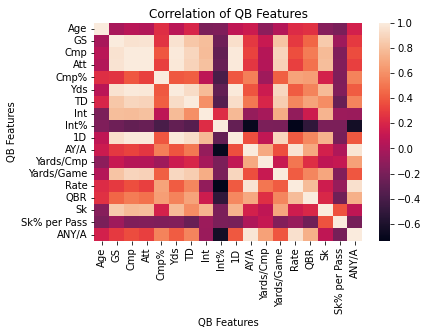

In [99]:
# Plotted heatmap to quickly visualize other correlated features to Yards/Game

sns.heatmap(df.corr(method='pearson'))
plt.title('Correlation of QB Features')
plt.xlabel('QB Features')
plt.ylabel('QB Features')
plt.show()

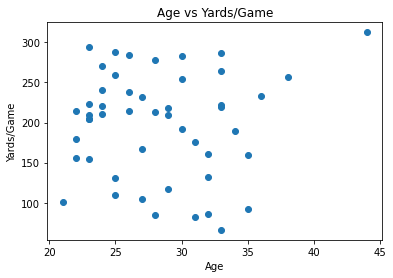

<AxesSubplot:xlabel='Age', ylabel='Yards/Game'>

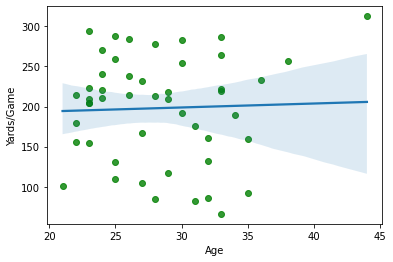

In [87]:
# Scatter Plot the correlation between Age vs Yards/Game (Hypothesis #2)

plt.scatter(x=df['Age'], y=df['Yards/Game'])
plt.title('Age vs Yards/Game')
plt.xlabel('Age')
plt.ylabel('Yards/Game')
plt.show()

# plot regression line: Age vs Yards/Game
sns.regplot(x='Age', y='Yards/Game', data=df, scatter_kws={'color': 'green'})

<AxesSubplot:xlabel='Age', ylabel='Yards/Game'>

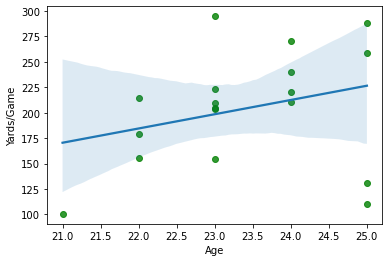

In [91]:
# Plotted  QB's under the age of 25 vs. Yards/Game

under_25 = df.query('Age <= 25')
sns.regplot(x='Age',y='Yards/Game', data=under_25, scatter_kws={'color': 'green'})

<AxesSubplot:xlabel='Age', ylabel='Yards/Game'>

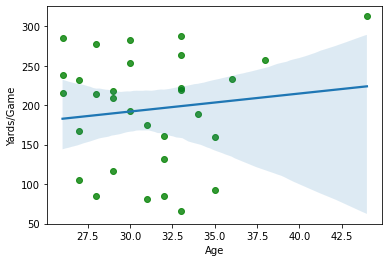

In [94]:
# Plotted  QB's over the age of 25 vs. Yards/Game
over_25 = df.query('Age > 25')
sns.regplot(x='Age',y='Yards/Game', data=over_25, scatter_kws={'color': 'green'})

<AxesSubplot:xlabel='Age', ylabel='Int'>

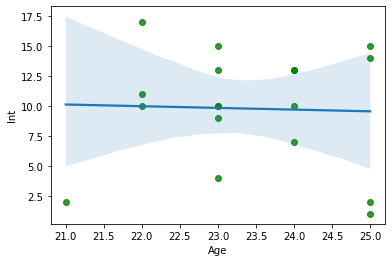

In [96]:
# checked to see if age plays a role in interceptions

sns.regplot(x='Age',y='Int', data=under_25, scatter_kws={'color': 'green'})

<AxesSubplot:xlabel='Age', ylabel='Int'>

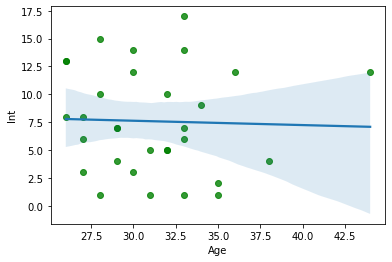

In [97]:
sns.regplot(x='Age',y='Int', data=over_25, scatter_kws={'color': 'green'})

<AxesSubplot:xlabel='1D', ylabel='Yards/Game'>

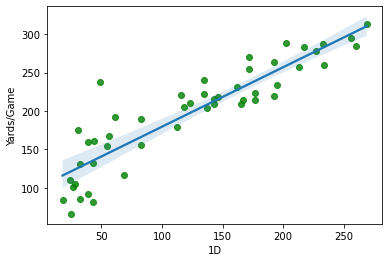

In [98]:
# Scatter plot: Throwing on first down vs Yards/Game
sns.regplot(x='1D',y='Yards/Game', data=df, scatter_kws={'color': 'green'})

In [ ]:
# Hypothesis #1 was correct in the sense that Cmp has a positive relationship to yards per game. 
# Hypothesis #2 was incorrect. There was little to none correlation with age and yards per game.
# There was one feature that stood out the most -- 1D, which had a very high correlation with yards per game.
# The more often the QB throws on first down, the more passing yards per game they will have.